In [142]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [143]:
x=[[1,2],[3,4],[5,6],[7,8]]
y=[3,7,11,15]

In [144]:
X=torch.tensor(x).type(torch.float32)

In [145]:
Y=torch.tensor(y).type(torch.float32)
Y.shape

torch.Size([4])

In [146]:
X.shape

torch.Size([4, 2])

In [163]:
class Modelling(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers=nn.Sequential(
                        nn.Linear(in_features=2,out_features=8),
              
                        nn.Linear(8,8),
                     
                        nn.Linear(in_features=8,out_features=1)
        )
    def forward(self,x):
        return self.layers(x)

In [164]:
device='mps' if torch.backends.mps.is_available() else 'cpu'
model=Modelling().to(device)

In [165]:
model

Modelling(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=1, bias=True)
  )
)

In [166]:
model.state_dict()

OrderedDict([('layers.0.weight',
              tensor([[ 0.2642, -0.4602],
                      [-0.4790,  0.2577],
                      [-0.5041, -0.1873],
                      [ 0.6735,  0.6109],
                      [ 0.1859, -0.6156],
                      [-0.0450, -0.1878],
                      [-0.2131, -0.6201],
                      [-0.0149, -0.0237]], device='mps:0')),
             ('layers.0.bias',
              tensor([-0.0702, -0.2986, -0.1511,  0.5430, -0.4152, -0.4179, -0.3588, -0.1704],
                     device='mps:0')),
             ('layers.1.weight',
              tensor([[-0.2457,  0.2863,  0.2141,  0.1169, -0.2163, -0.3061, -0.1479,  0.3485],
                      [ 0.2674, -0.1268,  0.1474, -0.2553,  0.0126, -0.0828,  0.2880,  0.1501],
                      [ 0.0687, -0.1031,  0.3328, -0.3128, -0.0310, -0.2032,  0.1951,  0.2247],
                      [-0.0521, -0.1531,  0.0861, -0.1843, -0.0644, -0.1573, -0.2792,  0.1309],
                      [ 0.1794

In [167]:
X=X.to(device)

In [168]:
Y=Y.to(device)
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model.parameters(),lr=0.001)

In [169]:
epoch=5000
from tqdm.auto import tqdm 
l=[]
for i in tqdm(range(epoch)):
    model.train()
    y_pred=model(X)
    loss=loss_fn(y_pred.squeeze(),Y)
    print(loss)
    l.append(loss.to('cpu').detach().numpy())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

  0%|          | 0/5000 [00:00<?, ?it/s]

tensor(9.0587, device='mps:0', grad_fn=<MeanBackward0>)
tensor(9.0067, device='mps:0', grad_fn=<MeanBackward0>)
tensor(8.9546, device='mps:0', grad_fn=<MeanBackward0>)
tensor(8.9024, device='mps:0', grad_fn=<MeanBackward0>)
tensor(8.8501, device='mps:0', grad_fn=<MeanBackward0>)
tensor(8.7976, device='mps:0', grad_fn=<MeanBackward0>)
tensor(8.7450, device='mps:0', grad_fn=<MeanBackward0>)
tensor(8.6922, device='mps:0', grad_fn=<MeanBackward0>)
tensor(8.6391, device='mps:0', grad_fn=<MeanBackward0>)
tensor(8.5859, device='mps:0', grad_fn=<MeanBackward0>)
tensor(8.5323, device='mps:0', grad_fn=<MeanBackward0>)
tensor(8.4785, device='mps:0', grad_fn=<MeanBackward0>)
tensor(8.4243, device='mps:0', grad_fn=<MeanBackward0>)
tensor(8.3698, device='mps:0', grad_fn=<MeanBackward0>)
tensor(8.3150, device='mps:0', grad_fn=<MeanBackward0>)
tensor(8.2597, device='mps:0', grad_fn=<MeanBackward0>)
tensor(8.2040, device='mps:0', grad_fn=<MeanBackward0>)
tensor(8.1479, device='mps:0', grad_fn=<MeanBack

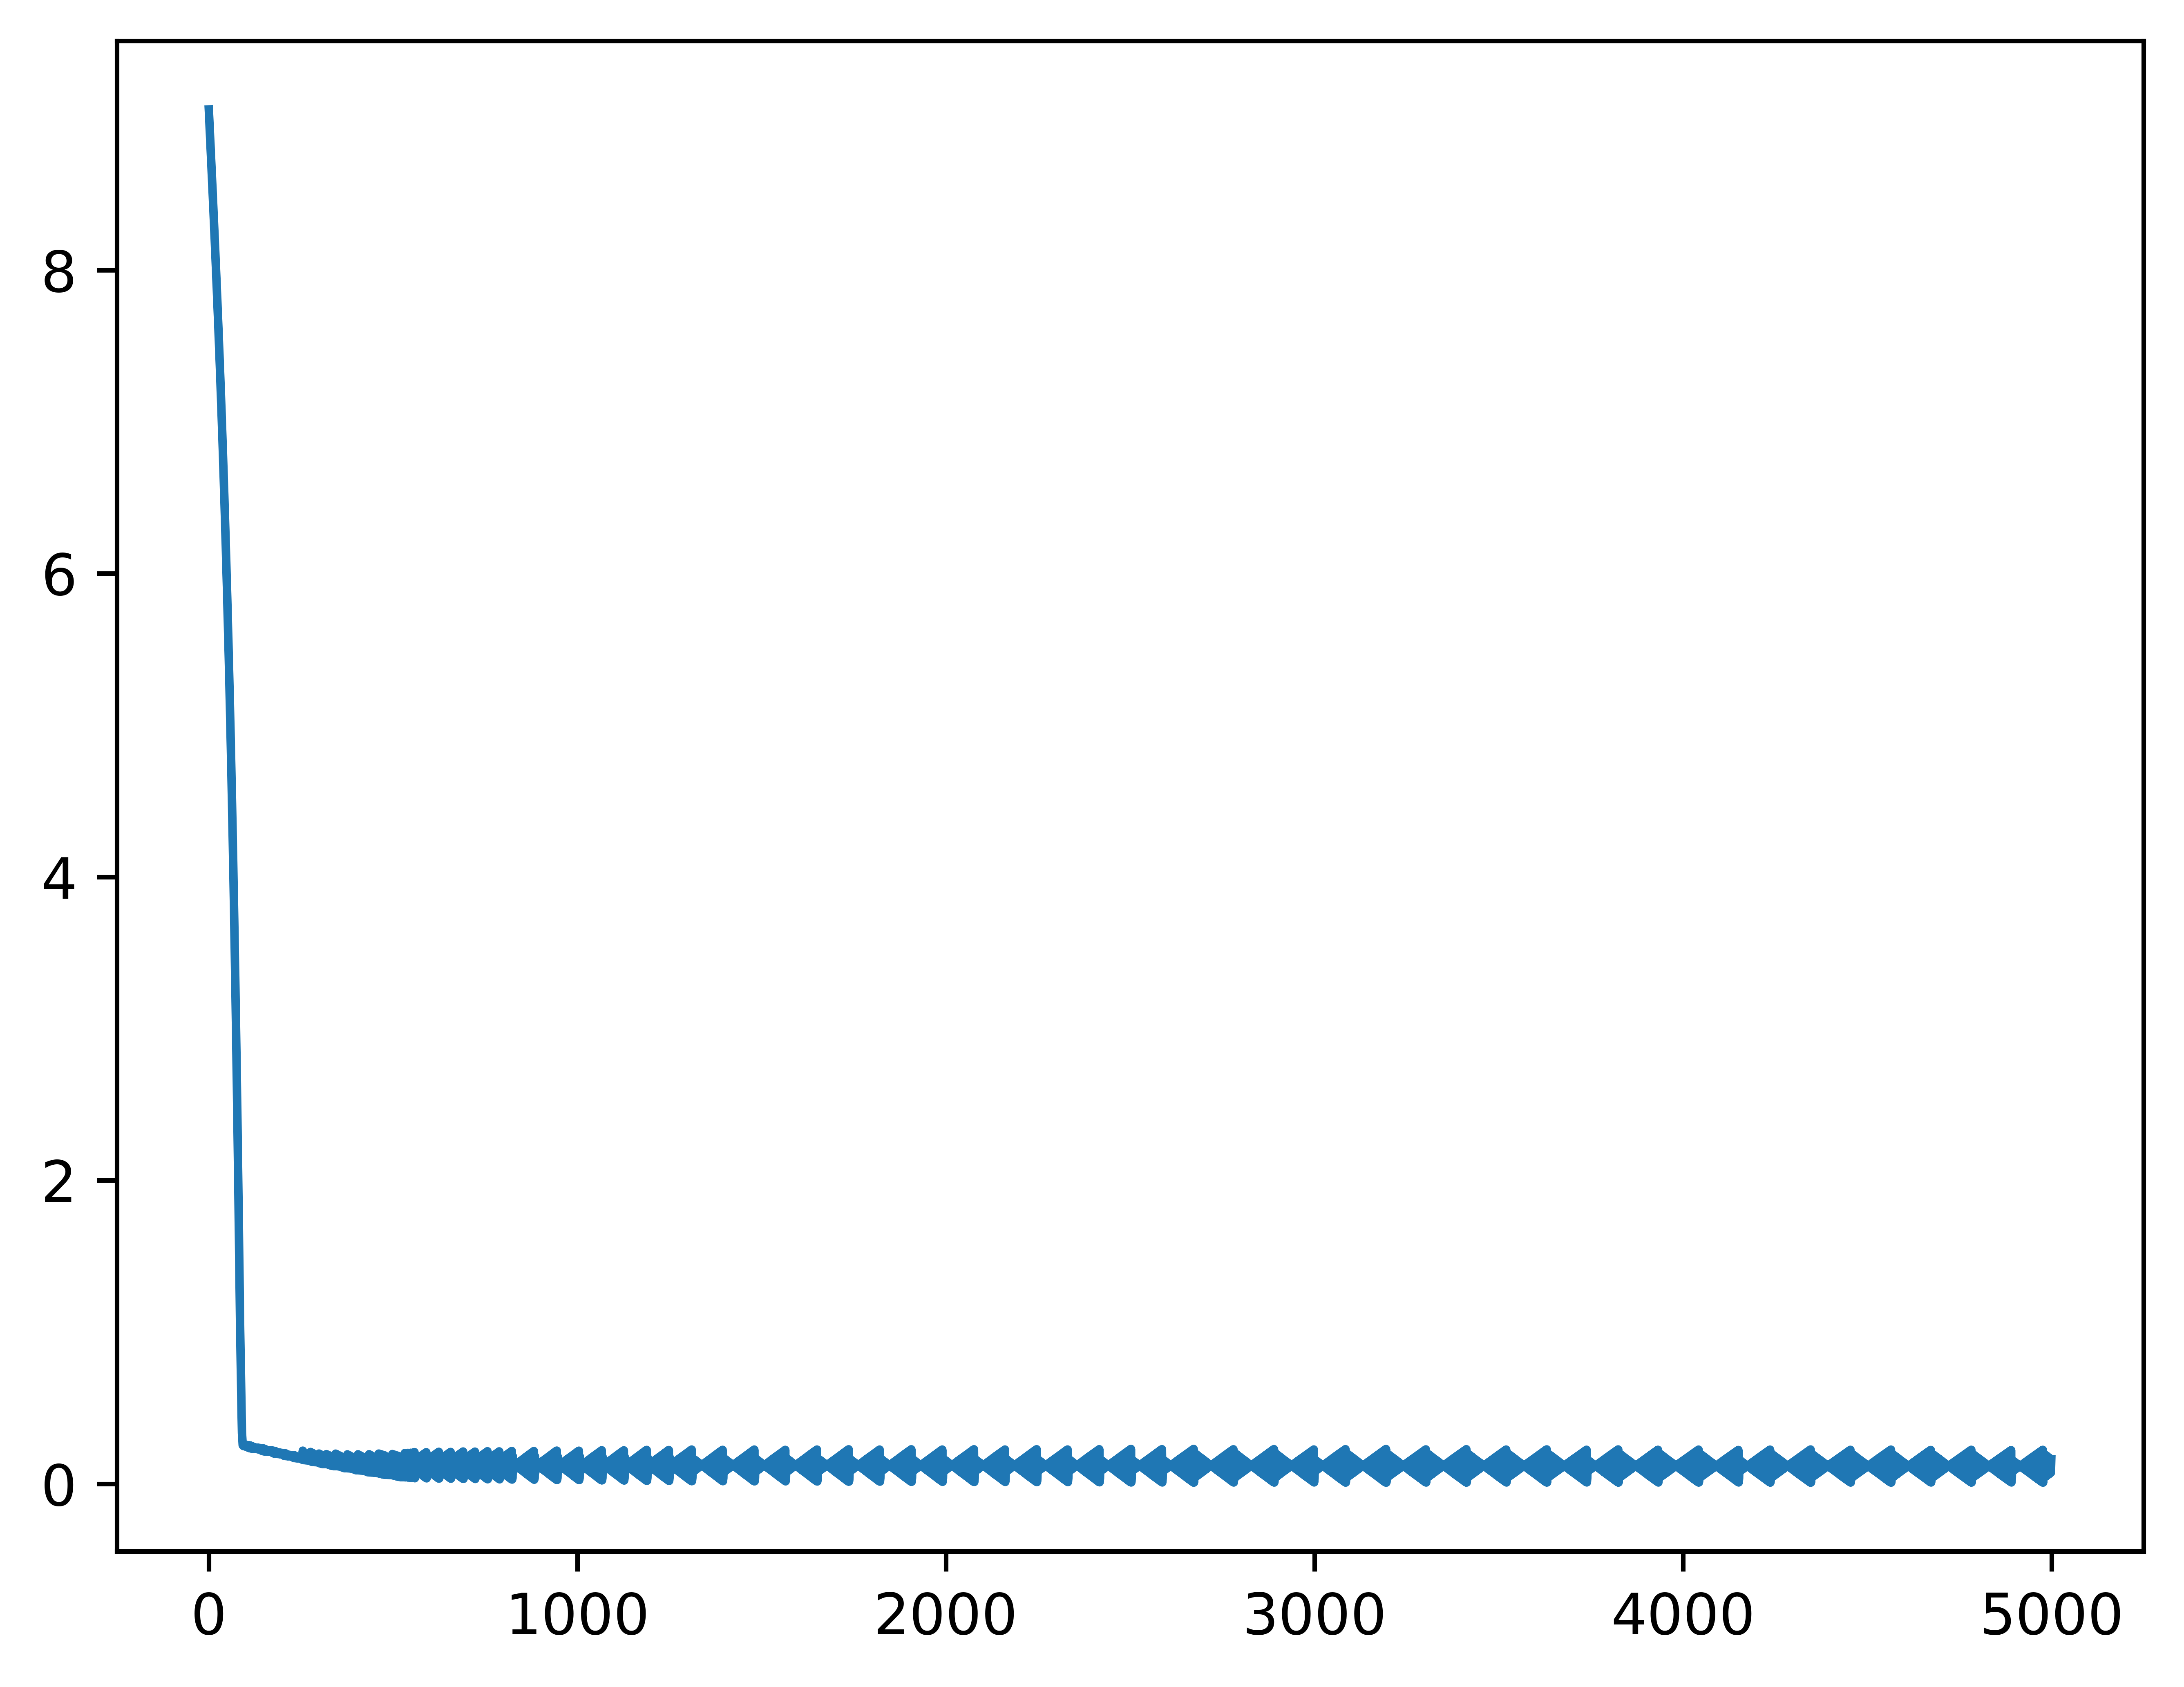

In [170]:
plt.figure(dpi=1000)
plt.plot(l)